# Heart Disease Prediction System 


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [78]:
df=pd.read_csv('heart_disease_dataset.csv')
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


### Dataset Understanding

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [80]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [81]:
print(df.shape)
total=df.isnull().sum()
print(total)


(1000, 16)
Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


This shows that the dataset has 16 Columns and 1000 rows and there are 8 integrers columns and 8 are strings and it shows that the youngest person here is the agr of 25 and the old main is at 79. And there are many null values only in alcohol intake column there are 340 null out of 1000. So first we need to preprocess the dataset like removing null values and one hot encoding to work with numerical data.


### Preprocessing

In [82]:
#Fixing null values
df['Alcohol Intake'].value_counts()



Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

this shows that this is categorical column where heavy volume is high so we should fill the null values with most frequent value

In [83]:
df['Alcohol Intake'].fillna('Heavy', inplace=True)
df.head()

C:\Users\shahd\AppData\Local\Temp\ipykernel_18152\1819279033.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol Intake'].fillna('Heavy', inplace=True)


,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Heavy,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Heavy,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Heavy,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [84]:
df.isnull().sum()

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64

so null values problem is solved now we have to convert the categorical column into numerical value like the column alcohol intake we take heavy as 1 and moderate to 0 and also for male and female and others for better training.
So we do manula mpping for binary columns like male of female and one hot encoding for categorical columns

In [85]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().to_string())



Column: Gender
Gender
Female    503
Male      497

Column: Smoking
Smoking
Never      338
Current    336
Former     326

Column: Alcohol Intake
Alcohol Intake
Heavy       686
Moderate    314

Column: Family History
Family History
No     501
Yes    499

Column: Diabetes
Diabetes
Yes    505
No     495

Column: Obesity
Obesity
No     501
Yes    499

Column: Exercise Induced Angina
Exercise Induced Angina
No     528
Yes    472

Column: Chest Pain Type
Chest Pain Type
Non-anginal Pain    256
Typical Angina      250
Asymptomatic        248
Atypical Angina     246


now we can see which column is binary and which is categorical now we convert these to numerical columns

In [86]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Heavy,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Heavy,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Heavy,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [87]:
#binary mapping
binary_columns=['Gender','Alcohol Intake','Family History','Diabetes','Obesity','Exercise Induced Angina']
binary_mapping={
    'Gender': {'Male': 1, 'Female': 0},
    'Alcohol Intake': {'Heavy': 1, 'Moderate': 0},
    'Family History': {'Yes': 1, 'No': 0},
    'Diabetes': {'Yes': 1, 'No': 0},
    'Obesity': {'Yes': 1, 'No': 0},
    'Exercise Induced Angina': {'Yes': 1, 'No': 0}  
}
for col in binary_columns:
    df[col] = df[col].map(binary_mapping[col])
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,Current,1,1,0,0,1,8,119,1,Atypical Angina,1
1,48,1,204,165,62,Current,1,5,0,0,0,9,70,1,Typical Angina,0
2,53,1,234,91,67,Never,1,3,1,0,1,5,196,1,Atypical Angina,1
3,69,0,192,90,72,Current,1,4,0,1,0,7,107,1,Non-anginal Pain,0
4,62,0,172,163,93,Never,1,6,0,1,0,2,183,1,Asymptomatic,0


now we will convert categorical columns that are smoking and chest pain types

In [88]:
df = pd.get_dummies(df, columns=['Smoking', 'Chest Pain Type'], drop_first=True)



In [89]:
df.head()
df.export_csv('heart_disease_dataset_preprocessed.csv', index=False)

AttributeError: 'DataFrame' object has no attribute 'export_csv'

In [ ]:
df.columns



Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Alcohol Intake', 'Exercise Hours', 'Family History', 'Diabetes',
       'Obesity', 'Stress Level', 'Blood Sugar', 'Exercise Induced Angina',
       'Heart Disease', 'Smoking_Former', 'Smoking_Never',
       'Chest Pain Type_Atypical Angina', 'Chest Pain Type_Non-anginal Pain',
       'Chest Pain Type_Typical Angina'],
      dtype='object')

done now our data is fully preprocessed now eda

## Exploratory Data Analysis (EDA)

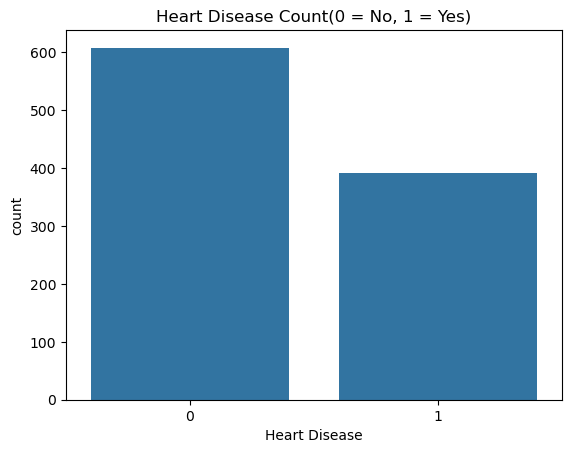

In [ ]:
sns.countplot(x='Heart Disease', data=df)
plt.title('Heart Disease Count(0 = No, 1 = Yes)')
plt.show()

shows there are more people who are normal and there are less person who has heart disease

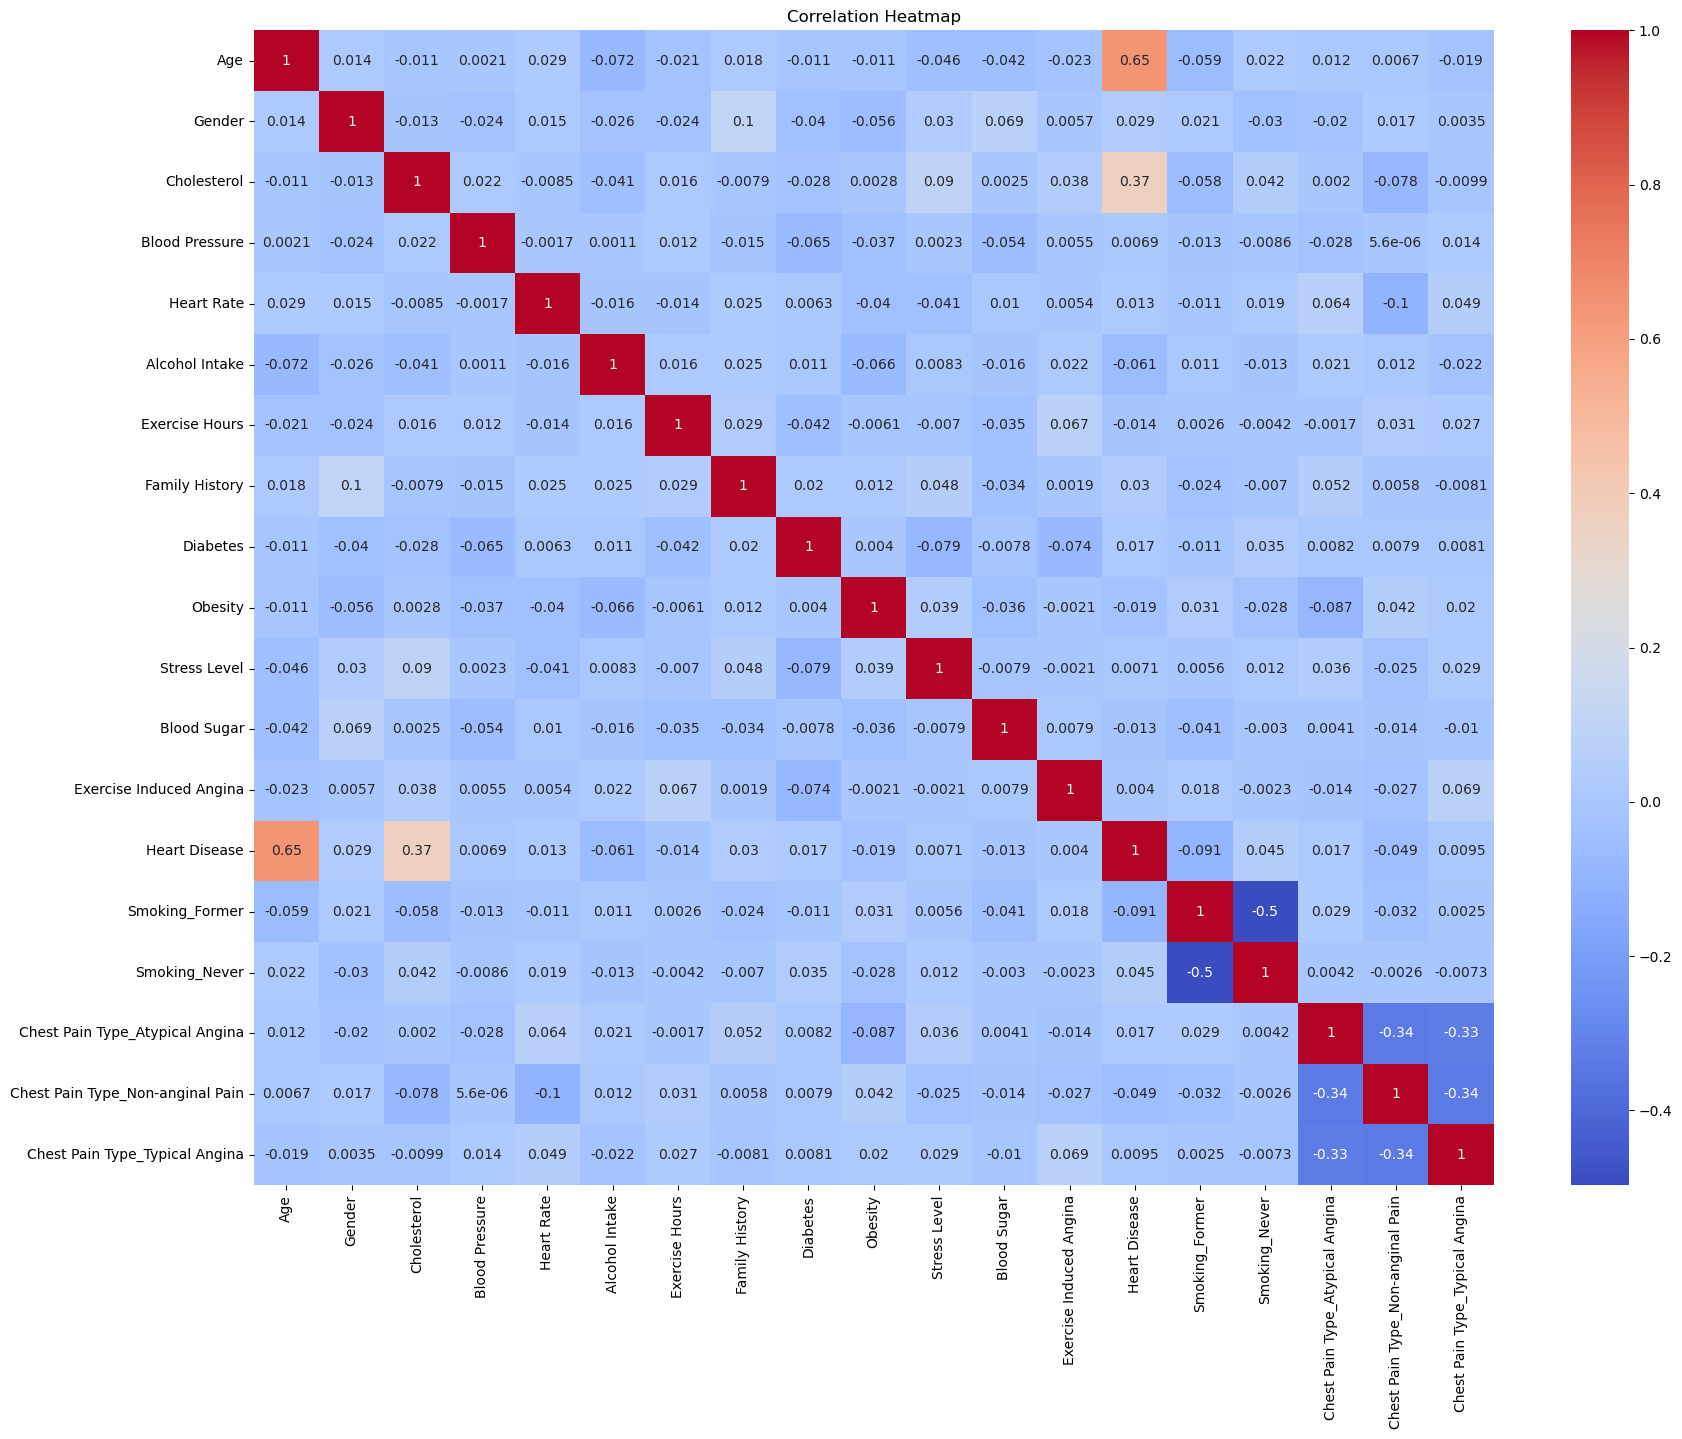

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

it is showing how strongly the columns corelale 0= no relate 1=strongly corelate. Like ag and heart disease are 0.65 corelate and cholestrol and heart disease are 0.37 corelate.

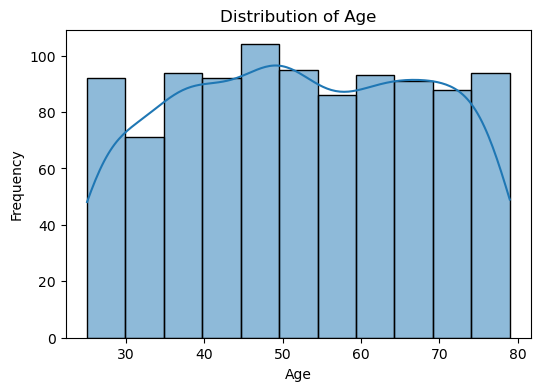

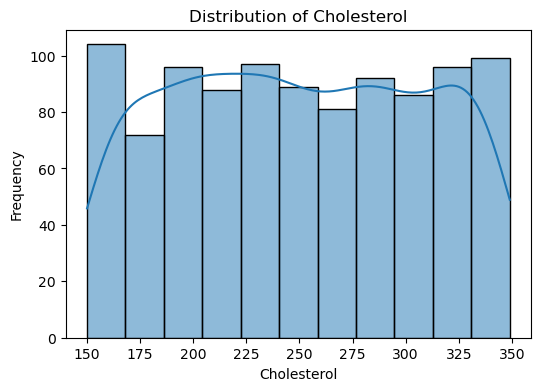

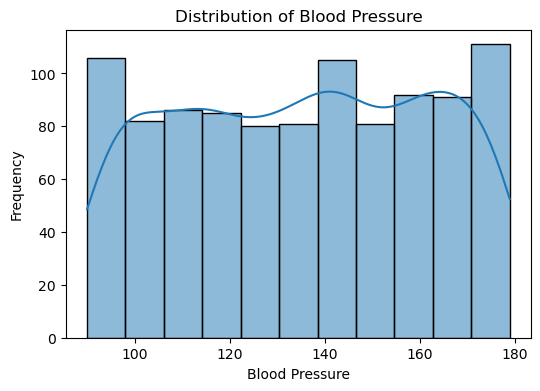

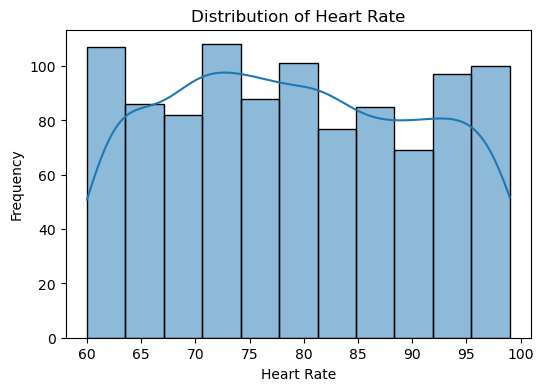

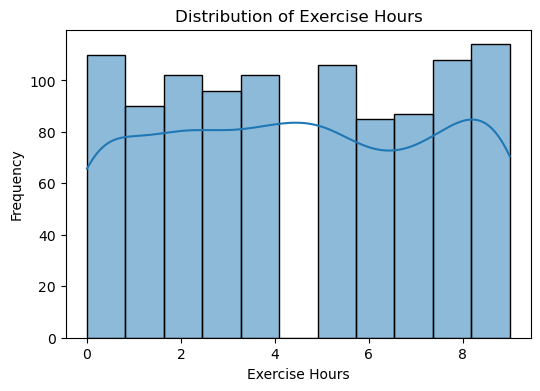

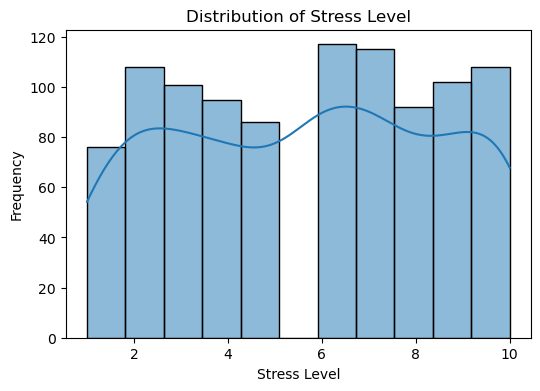

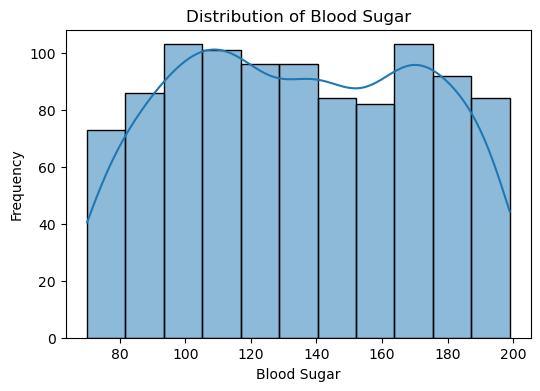

In [ ]:
numerical_cols = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


this shows of frequency of each attribute like how many people has blood sugar etc

### Numerical Features vs heart disease

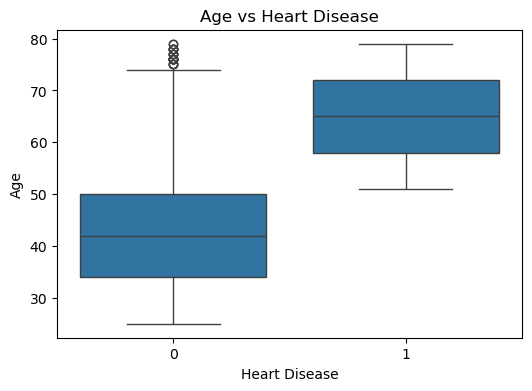

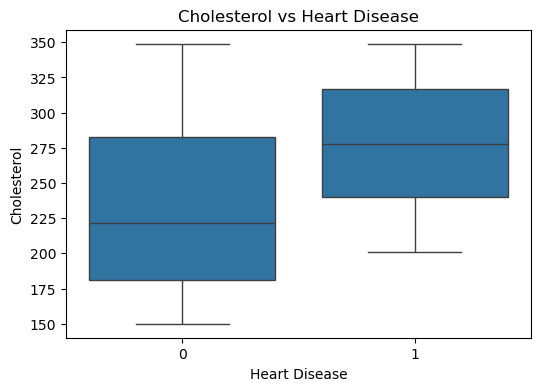

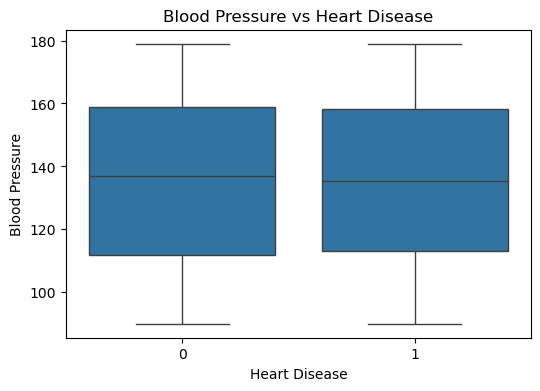

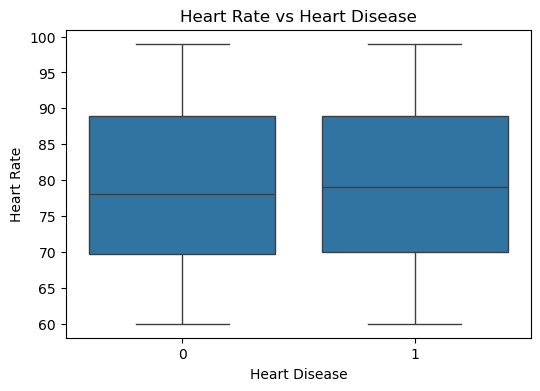

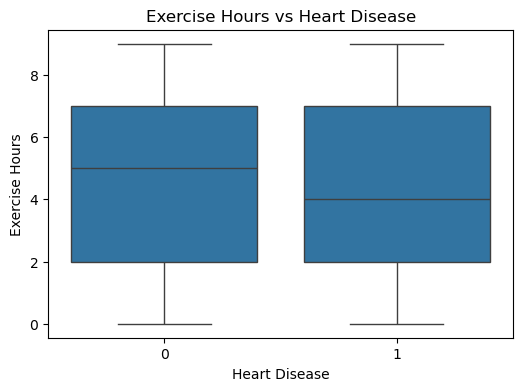

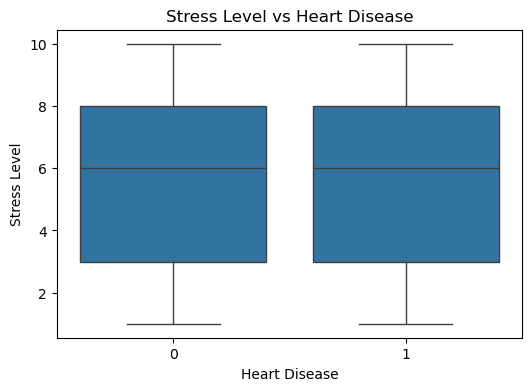

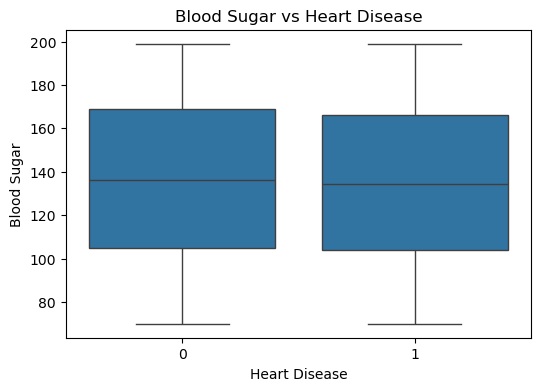

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Heart Disease', y=col, data=df)
    plt.title(f'{col} vs Heart Disease')
    plt.show()


this is showing the relation between numerical features and heart disease. The box plots show how the distribution of each numerical feature varies with the presence or absence of heart disease. e.g it shows that hte people between 55 to 70 has more heart disease, high cholestrol level has more heart disease.

### Binary Feature vs Heart Disease

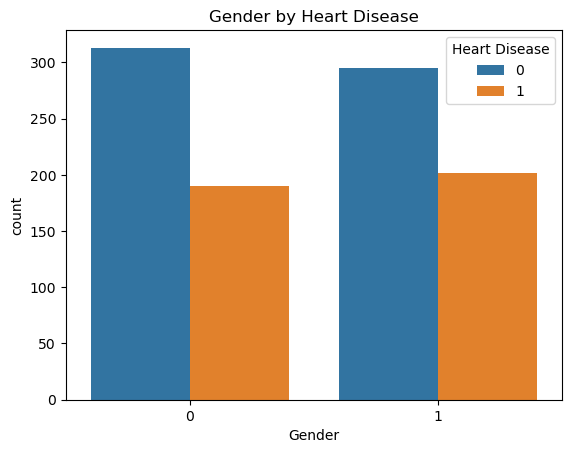

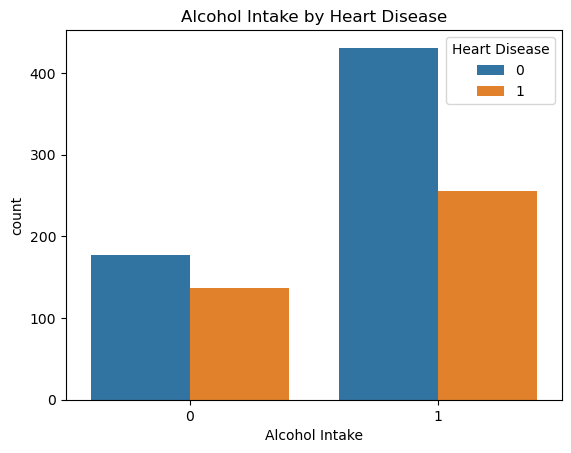

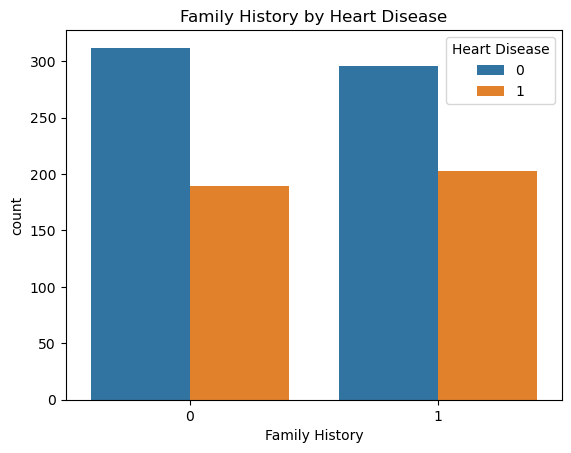

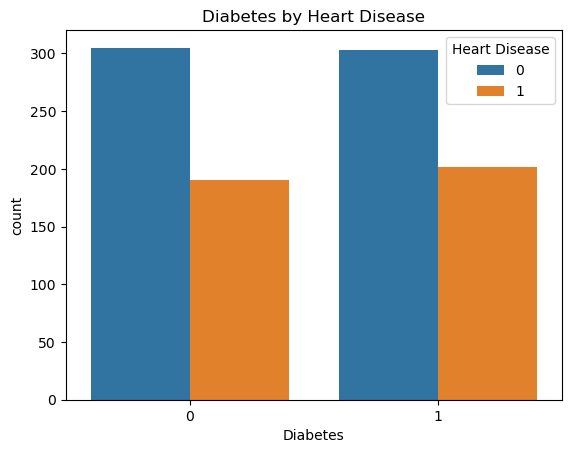

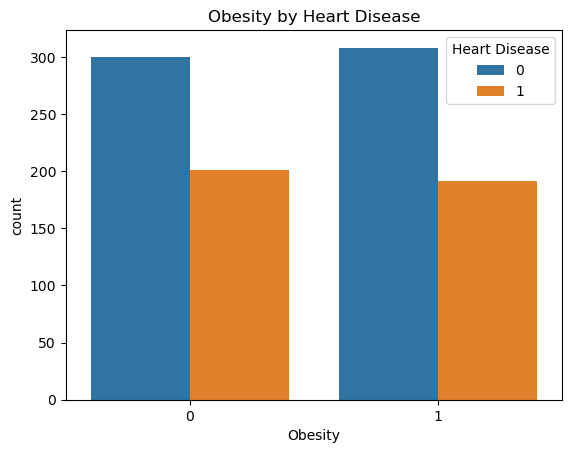

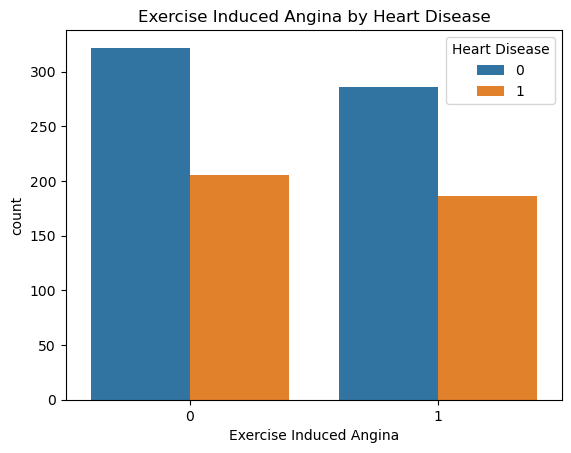

In [ ]:
binary_cols = ['Gender', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']

for col in binary_cols:
    sns.countplot(x=col, hue='Heart Disease', data=df)
    plt.title(f'{col} by Heart Disease')
    plt.legend(title='Heart Disease')
    plt.show()


this shows which binary features increase the chance of heart disease. like the people tke alcohol has more chances of heart disease while other has less.

### Categorical COlumns vs heart disease

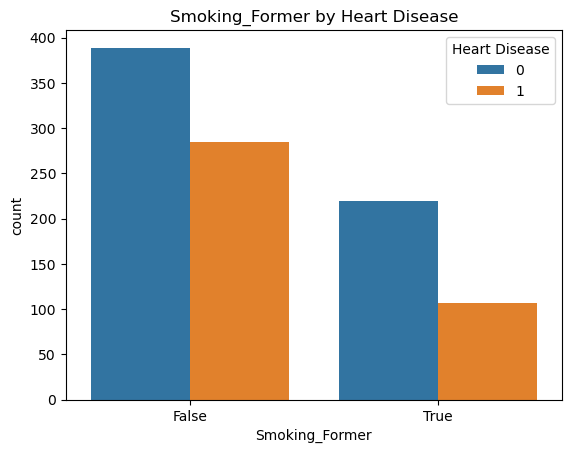

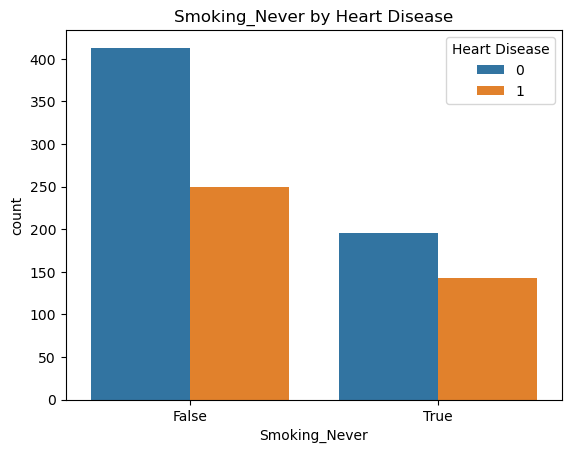

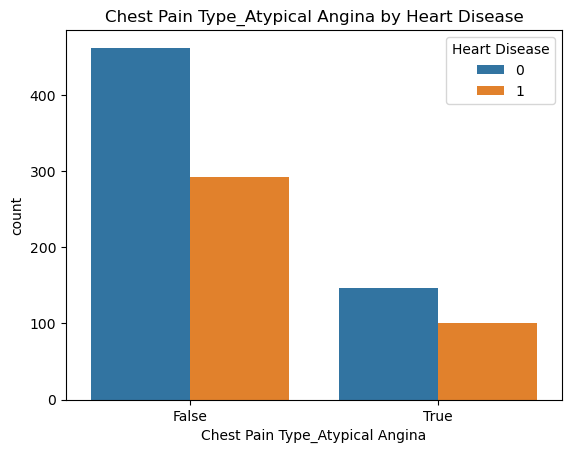

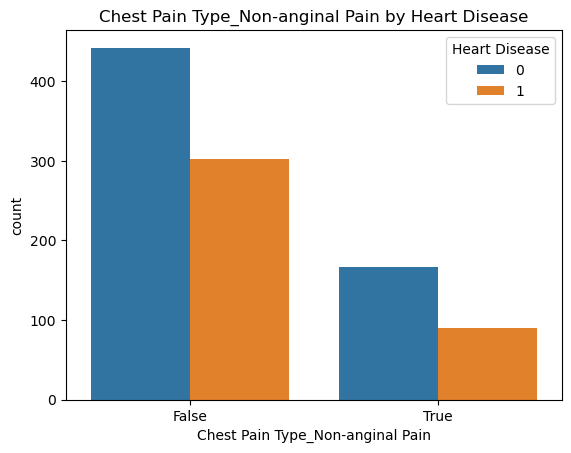

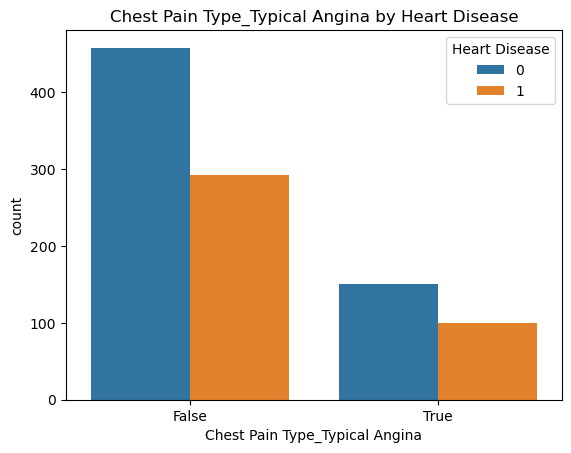

In [ ]:
categorical_ohe = ['Smoking_Former', 'Smoking_Never',
                   'Chest Pain Type_Atypical Angina',
                   'Chest Pain Type_Non-anginal Pain',
                   'Chest Pain Type_Typical Angina']

for col in categorical_ohe:
    sns.countplot(x=col, hue='Heart Disease', data=df)
    plt.title(f'{col} by Heart Disease')
    plt.show()


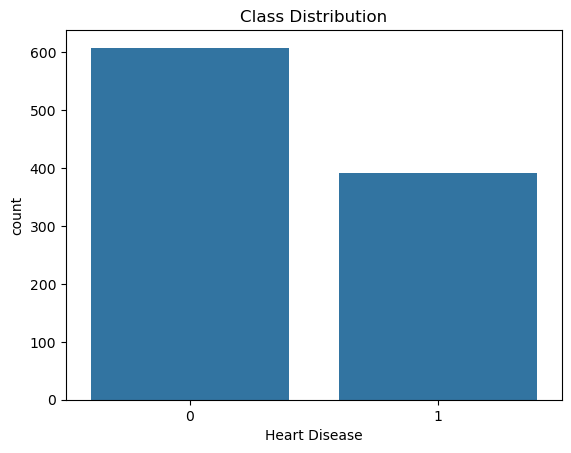

Heart Disease
0    608
1    392
Name: count, dtype: int64
Heart Disease
0    0.608
1    0.392
Name: proportion, dtype: float64


In [105]:

sns.countplot(x='Heart Disease', data=df)
plt.title("Class Distribution")
plt.show()

print(df['Heart Disease'].value_counts())
print(df['Heart Disease'].value_counts(normalize=True)) 


Well by doing eda we got to know that our classes are imballanced so we need to fix this before train our model

### Feature Engineering and Class Balanced

In [106]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [113]:
print(X_train_bal.shape)
print(X_test.shape)
print(y_test.value_counts())


(972, 18)
(200, 18)
Heart Disease
0    122
1     78
Name: count, dtype: int64


it has balanced x train and y train with same amount using smote

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_bal_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression:

[[107  15]
 [ 13  65]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       122
           1       0.81      0.83      0.82        78

    accuracy                           0.86       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.86      0.86       200


Decision Tree:

[[122   0]
 [  0  78]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00        78

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Random Forest:

[[122   0]
 [  1  77]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99        78

    accuracy                           0.99       200
  

now it shows the accuracy recall and f1 score since accuray is not everything i can see all three models are working good but in my case i must check every thing like precision recall and f1 score 

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for name, model in models.items():
    model.fit(X_train_bal_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    })
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score  ROC-AUC
0  Logistic Regression      0.86     0.8125  0.833333  0.822785  0.95166
1        Decision Tree      1.00     1.0000  1.000000  1.000000  1.00000
2        Random Forest      1.00     1.0000  1.000000  1.000000  1.00000


we can see the accuracy, precision, recall and f1 sore and roc auc are 1 for both decision tree and random forest which is kinda suspicious so we will do cross validate

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = []

for name, model in models.items():
    scores = cross_validate(model, X_train_bal_scaled, y_train_bal, 
                            scoring=scoring, cv=10, return_train_score=False)

    cv_results.append({
        "Model": name,
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision'].mean(),
        "Recall": scores['test_recall'].mean(),
        "F1 Score": scores['test_f1'].mean(),
        "ROC-AUC": scores['test_roc_auc'].mean()
    })

cv_results_df = pd.DataFrame(cv_results)
print(cv_results_df)


                 Model  Accuracy  Precision   Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.853955   0.850189  0.86199  0.855056  0.947943
1        Decision Tree  1.000000   1.000000  1.00000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.00000  1.000000  1.000000


now i know my models are not overfitting now compare

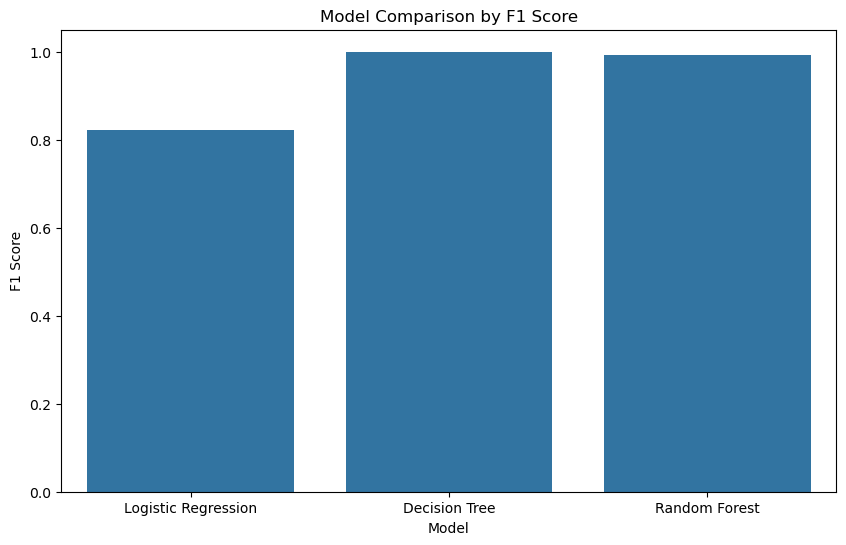

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1 Score", data=results_df)
plt.title("Model Comparison by F1 Score")
plt.ylabel("F1 Score")
plt.show()

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_bal_scaled, y_train_bal)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       122
           1       1.00      0.99      0.99        78

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



i have done the fine tuning of random forest because logistic regressio has very few hyperparameters and decision tree tends to overfit easily and it was already showing perfect score so i have tuned only random forest becasue it is more robust and performs better with tuning it reduced overfitting.

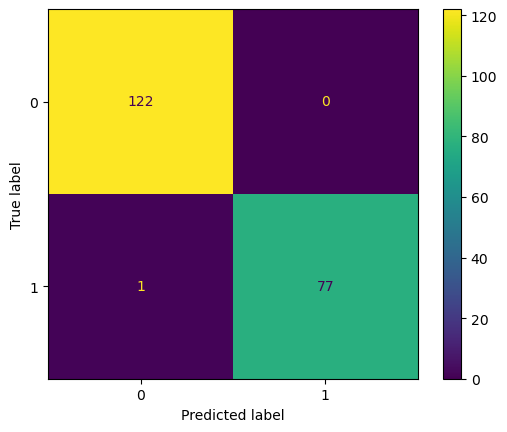

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_scaled, y_test)


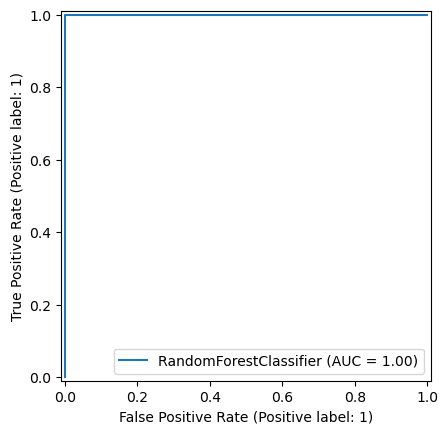

In [99]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_rf, X_test_scaled, y_test)


In [104]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X_train_bal_scaled, y_train_bal, cv=5, scoring='f1')
print("F1 CV Scores:", scores)
print("Mean F1 Score:", scores.mean())


F1 CV Scores: [1. 1. 1. 1. 1.]
Mean F1 Score: 1.0


## Exporting Models 

In [114]:
import joblib
joblib.dump(scaler,'scaler.joblib')
joblib.dump(models['Logistic Regression'], 'logistic_regression.joblib')
joblib.dump(models['Decision Tree'], 'decision_tree.joblib')
joblib.dump(best_rf, 'random_forest_tuned.joblib')


['random_forest_tuned.joblib']

i have also save the scaler and the models so that i can use them later without retraining and used the scaler fro same random state other wise my prediction will be wrong when i work with user data